In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Reasons to expand Women Representation.**

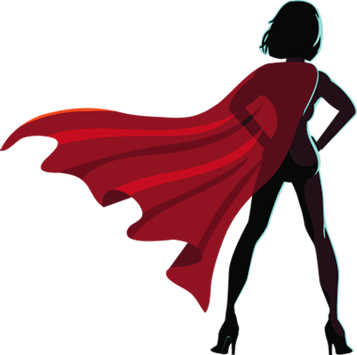

**Overview**

There are five main features which are considered for the EDA,**'Department/Source', 'Name', 'Person', 'Gender', 'Reference' and 'Comments'.**
**Reference and Comments** tells us about the type of facility/representation in City-owned buildings and other features are self explanatory.

There are ten representations which are **named after more than one person** which consist of relatives (family, spouses, etc.). Only 1 building has the name of two men.

It is also seen that there are repeated Male representations of the same person in different buildings, whereas there is no repeated Female representation.

In total there are **54 only Male** representations and **19 only Female** representations. Most Female representations were in the Administrator department category. Women representation in every department is lower than the male representation.

Department/ Source categories which **do not have any Female representations**:
* Airport 
* PUC - There are representations of Males the Civil Professions. There must representations of women in civil professions also.
* SFMTA

# Reading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/kaggle/input/women-representation-in-city-property-sanfrancisco/WomenRepresentaionInCityProperty-SanFrancisco.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.describe(include='all')

**Current Police Districts, Current Supervisor Districts, Analysis Neighborhoods, Neighborhoods, SF Find Neighborhoods** *have non-unique values, their data is same for both male and females.*

In [ ]:
df.info()

Person, Reference and Comments have missing values.

*Lets see the null data first.*

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

White is the missing data.

**Reference and Comments** tells us about the type of facility/representation in City-owned buildings.

*We can see in the heatmap that for the data where References are not mentioned(**where reference is null**) Comments are absolutely mentioned for that data, which means we know **the type of every facility in City-owned Building mentioned** in the dataset.* 

# EDA

In [ ]:
df['Gender'].value_counts()

In [ ]:
mylabels='Male','Female', 'Female and Male', 'Male and Female', 'Male and Male'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
shared = ['F & M','M & M','M & F']   

shared_df = df[df['Gender'].isin(shared)] 

shared_df=shared_df.reset_index(drop=True)
shared_df

There are 10 buildings name after **more than one person**. Out of which one is named after **2 males**, while others are named after **both males and females**. 

*Buildings named after both Male & Female will be removed from the dataset because they defeat the purpose of our analysis, that is to compare the representation of men and women in various facilities.*

*Also, Current Police Districts, Current Supervisor Districts, Analysis Neighborhoods, Neighborhoods, SF Find Neighborhoods will be dropped.*

In [ ]:
df = df[['Department/Source','Person', 'Gender', 'Name','Reference', 'Comments']]

In [ ]:
df = df[(df['Gender']!= 'F & M') & (df['Gender']!= 'M & F')]


Since M & M represents a building named after only males, I am going to put it under Males Category.

In [ ]:
df['Gender'] = df['Gender'].replace('M & M','M')

In [ ]:
df['Gender'].value_counts()

In [ ]:
mylabels='Male','Female'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
g = sns.catplot(x="Department/Source", hue="Gender", col="Gender",
                data=df, kind="count",
                height=4, aspect=2)

**There are more facilities named after Males than Females, and the total percentage of Female centric buildings is not even 30%.**

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Name', opacity = 0.5)

All Names are unique.

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Person', opacity = 0.5)

A few Male names have been used more than once.

# Data Visualization and Analysis

## Representation in Department/ Source 

In [ ]:
plt.figure(figsize = (16,8))
ax = sns.countplot(y="Department/Source", hue="Gender", data=df, palette="gnuplot")
plt.ylabel('Department/Source', size= 18)
plt.title('Department/Source Male-Female Count', size = 20)
plt.show()

* Most of the facilities fall under the **Administrator** category.
* Count of facilities named after Males is mostly more than the buildings named after Females in each category. 
* **Airport, PUC and SFMTA** categories don't have any buildings named after Females.



### **Administrator**

*Let's see what types of facilities are included in the Administrator category.*

In [ ]:
admin = df['Department/Source'].isin(['Administrator'])
df_admin = df[admin].reset_index(drop=True)
df_admin

In [ ]:
df_admin['Reference'].value_counts()

In [ ]:
df_admin['Gender'].value_counts()

In [ ]:
mylabels='Male','Female'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df_admin['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

There are **less than 30% facilities named after Females** in Administrator category.

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.countplot(y="Reference", hue="Gender", data=df_admin, palette="gnuplot")
plt.ylabel('Reference', size= 18)
plt.title('Reference Male-Female count', size = 20)
plt.show()

The facilities/representations in: **Public Utilities Commission, Airport(Sfo), Zellerbach Rehearsal Hall, Fine Arts Museums, Fire Department** are only of ***Males*** in Administrator Category.

The facilities/representations in: **Arts Commission and War Memorial Opera House** are only of ***Females*** in Administrator Category.

### **REC and Parks**

In [ ]:
rp = df['Department/Source'].isin(['REC AND PARKS'])
df_rp = df[rp].reset_index(drop=True)
df_rp

In [ ]:
df_rp['Gender'].value_counts()

There are **33% facilities/representations of Females** in REC and Parks category.

In [ ]:
mylabels='Male','Female'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df_rp['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

Since the Reference values are Null, Comments are used for visualization.

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.countplot(y="Comments", hue="Gender", data=df_rp, palette="mako")
plt.ylabel('Comments', size= 18)
plt.title('Comments Male-Female Count', size = 20)
plt.show()

There are only two types in **REC and Parks** category,

1. Park
2. Facilities and other amenities

In both the types, Male facilities/representations are more.

*Female facilities/representations include, Library, Recreation Centre and Buildings and a Museum.*

### **Airport**

In [ ]:
ap = df['Department/Source'].isin(['AIRPORT'])
df_ap = df[ap].reset_index(drop=True)
df_ap

There is **only one** Airport Facility which is named after a **Male**. 

***No female recognition here.***

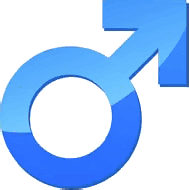

### **PUC**

In [ ]:
puc = df['Department/Source'].isin(['PUC'])
df_puc = df[puc].reset_index(drop=True)
df_puc

There are only two facilities in PUC category, **both of which are named after Males.**

***Here also, no female recognition.***

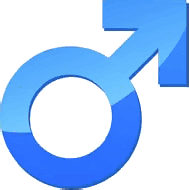

### **Library**

In [ ]:
lib = df['Department/Source'].isin(['LIBRARY'])
df_lib = df[lib].reset_index(drop=True)
df_lib

Two out of five representations are of Females in Library category.

In [ ]:
mylabels='Male','Female'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df_lib['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

### **SFMTA**

In [ ]:
sfmta = df['Department/Source'].isin(['SFMTA'])
df_sfmta = df[sfmta].reset_index(drop=True)
df_sfmta

Only Male recognition can be seen in SFMTA.

***Here also, no female recognition.***

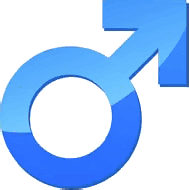

### **Port**

In [ ]:
port = df['Department/Source'].isin(['Port'])
df_port = df[port].reset_index(drop=True)
df_port

Equal Recognition of Male and Female.

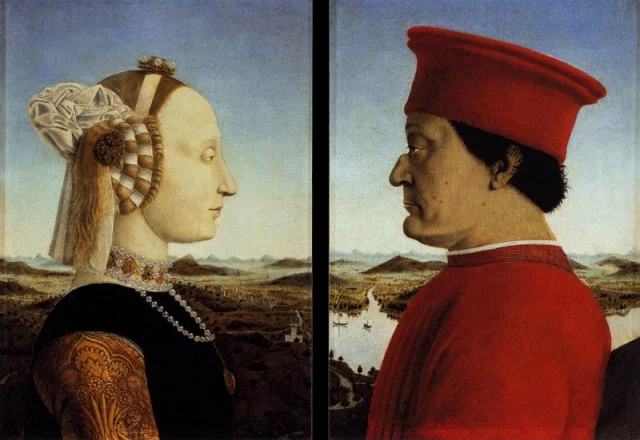

### **RED**

In [ ]:
red = df['Department/Source'].isin(['RED'])
df_red = df[red].reset_index(drop=True)
df_red

Two representations of Males and one representation of Female.

In [ ]:
mylabels='Male','Female'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Male and Female Distribution")
plt.pie(df_red['Gender'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

## Reference counts of Male and Female Representations.

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Reference',color="Gender", opacity = 0.5)

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Reference',color="Department/Source", opacity = 0.5)

## Comments counts of Male and Female Representations.

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Comments',color="Gender", opacity = 0.5)

In [ ]:
import plotly.express as px
px.histogram(df, x = 'Comments',color="Department/Source", opacity = 0.5)